# Symbolic Algebra in Python
---

Computers are inherently excellent at doing numeric calculations. By default, they are not nearly as capable of doing the types of symbolic manipulation you might do in an algebra or calculus class, and thus software like Mathematica and Maple exists. We can get similar functionality in Python (for free!) by using the `Sympy` module. This notebook is intended as a sort of crash course in the basics of Sympy functionality.

<div class='alert alert-success'>
<b>Today's Goal:</b> To achieve a working knowledge of the basics of Sympy so that it can be used to assist with homework.
</div>
<br>

#### Table of Contents
0. [Setup](#setup)
1. [Manipulating Functions](#manip)
2. [Basic Calculus](#calc)
3. [Vector Calculus](#vcalc)

## 0. Setup <a name='setup'></a>
If you installed Python through the Anaconda distribution, you should already have Sympy on your system and you just need to import it:

In [5]:
import sympy as sym

I almost always import sympy as sym, but if you are **only** going to be using Sympy in a notebook, you can eliminate some repetitive typing by using `from sympy import *` instead. Use this only if you understand name-spaces enough to keep yourself out of trouble though!

The above is all we'd need to get Sympy working. However, we can also ask it to use LaTeX in our notebook to output the equations all pretty! To do so, we just need to run

In [6]:
sym.init_printing()

Now we are good to go! Sympy isn't the lightest of modules, so I'd generally recommend you only import it if you are actually going to be using it in a notebook.

<div class='alert alert-info'>
Jupyter notebooks have a built in <b>help</b> functionality through the use of <code>?</code>. If you ever need to get more information about what inputs a function has or some examples on how to use it, a good place to start is always with <code>function_name?</code>. This will pop up a help window in the bottom of your notebook that you can use as a reference. For quick questions, it is almost always faster than googling for an answer!
</div>

## 1. Creating and Manipulating Functions <a name='manip'></a>
When dealing with symbols in a programming environment, we immediately run upon a small conundrum. In programming we use variables to refer to various numeric values. For instance we might assign `x = 10`. However, when we are doing symbolic math, our "variables" are _symbols_, and we won't be assigning a value to them. In order to be clear about what type of variable we are creating, we have to specifically state what variables we want to be _symbolic_ variables in Sympy. We do so by using `sym.symbols`:

In [7]:
x, y, z = sym.symbols('x, y, z')

The values on the left are what the programming variables will be named. The values in quotes on the right are the __symbolic__ variables those programming variables represent.

<div class='alert alert-info'>
Note that they don't necessarily have to match, so if you wanted to make your life miserable, you could do something like <code>x, y, z = sym.symbols('z,x,y')</code>, at which point whenever you used the variable <code>x</code>, you'd be referring to the symbolic variable <code>z</code>. I don't recommend this approach...
</div>

### Creating Expressions
Once our variables are defined, we can use them to create functions!

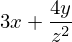

In [8]:
3*x + (4*y)/(z**2)

You can see the pretty printing at work in the above expression. Note that you still need to use things like `**` for "raised to the power of" operators. Also, if you are needing other special functions like `sin` or `sqrt`, you'll need to use the Sympy versions. Below we'll assign our function to the variable `expr`.

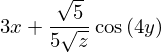

In [9]:
expr = 3*x + sym.cos(4*y)/sym.sqrt(5*z)
expr   # if you want the function to display after you create it, you need this

### <font color='orange'>Your Turn</font>
Create two expressions, one named `e1` and the other named `e2` corresponding to the below equations. If you need to declare any other symbolic variables, go ahead and do so.

\begin{align*}
E_1(x,t) &= t(10+t)+5x \\
E_2(x,t) &= x - 5
\end{align*}

In [ ]:
# Your Code Here

e1, e2  # This will just display both once you've defined them

### Combining and Manipulating Expressions
Once you've defined expressions, you can manipulate them just like other variables. So you can add, subtract, multiply, etc. For example:

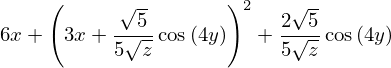

In [11]:
combined = expr**2 + 2*expr
combined

There are however some particular features of equations that we might want to take advantage of. One of the first, and most useful, is the `simplify` function. Simplify tries its best to rewrite the expression you've given it into the most simple form. It does a decent job, though sometimes "simple" is subjective.

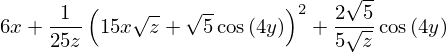

In [12]:
combined.simplify()

We can also `expand` an expression into all its parts, which will "foil" everything out:

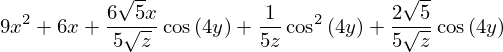

In [13]:
combined.expand()

Or, in the opposite direction, we can `factor` an expression to try to factor out as many mutual terms as possible. Here note that I called `sym.factor` instead of using `.factor()`. You can generally use whichever notation you prefer! (However, `sym.factor?` will give you much more useful help than `combined.factor?`.)

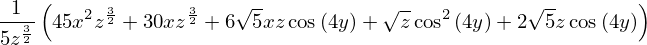

In [14]:
sym.factor(combined)

### <font color='orange'>Your Turn</font>
Get the result of
$$ E_1 - 5E_2 $$
into the simplest result **you can** and output the result.

In [ ]:
# Your Code Here

### Solving Equations
Perhaps one of the nicest aspects of Sympy is its ability to numerically solve an expression for a particular variable, _or to solve systems of equations for several variables_. The notation is very similar to Mathematica, where you provide first the expression and then the desired variable(s) to solve for.

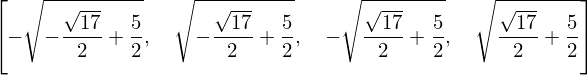

In [16]:
newexpr = x**4 - 5*x**2 + 2
sym.solve(newexpr, x)

Two things to note:
* Solutions are returned as a list, so you could save them as a variable and then access them with an index later
* I never set what the expression was equal to! **By default, Sympy assumes expressions are equal to 0.**

If you have an expression that is _not_ equal to 0, you can either rearrange it to get everything on one side or you can use `sym.Eq( lhs, rhs )` where the two arguments are the left and right hand sides of your equation. For example, to get the 3rd solution to $x^4 - 5x^2 + 2 = -3$ I could go:

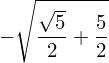

In [17]:
sols = sym.solve(sym.Eq(newexpr,-3), x)
sols[2] # 2 for the 3rd solution since Python starts at 0

### <font color='orange'>Your Turn</font>
Using your same expressions from earlier, solve the equation
$$ 2E_1 + 4 = E_2 $$
for $t$ and display all solutions.

In [ ]:
# Your code here

### Making Substitutions
Finally, a basic task that you often might like to do is substitute different values in for your symbolic variables. Maybe you want to evaluate your expression when $x=3$, or maybe you want to make a change of variables to $x=t^2$. For these situations, the `subs` command is Sympy is your friend. Suppose I have an expression $x^2 + 4x - 1$:

In [19]:
expr3 = x**2 + 4*x - y
expr3

I can substitute in a value like:

In [20]:
expr3.subs(x,3) # variable first, then value

Or you can substitute multiple values or terms like:

In [21]:
expr3.subs( [(x,t**2), (y,10)]) # sub x -> t**2 and y -> 10

# If you like, you can also use a dictionary for this and it is a bit cleaner imho
# expr3.subs({x:t**2, y:10})

### <font color='orange'>Your Turn</font>
Evaluate and expand the expression
$$ E_1^3 - 10 E_2 $$
when $t=y^2$ and $x=2$.

In [7]:
#Your Code Here

## 2. Basic Calculus <a name='calc'></a>
In addition to make algebra, frequently we might want a little help or desire to check our work on some calculus. Sympy is fully capable of doing derivatives and integration given the frameworks we have created. Derivatives utilize the `diff` command, and can again be written in either `sym.diff()` or `expr.diff()` formats. Recalling that our 3rd sample expression looked like:

In [23]:
expr3

### Derivatives
We can take a derivative with respect to $x$:

In [24]:
expr3.diff(x)

Note that this is really the partial derivative, as it treats $y$ like a constant! If your function has only a single variable, you don't need to specify the derivative variable. You can do multiple differentiations easily by passing a number after the variable. So, for example, the 2nd derivative of the above would just be:

In [25]:
sym.diff(expr3, x, 2)
# or expr3.diff(x,2)

### <font color='orange'>Your Turn</font>
Find all points where the function
$$ x^3 + (x-3)^2 +2 $$
has a slope of 1.

In [12]:
# Your Code Here

### Integration
We can do integration in a similar and easy fashion. For an indefinite integral:

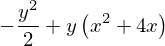

In [27]:
expr3.integrate(y)

If you want limits along with your integral, include the variable of integration and the upper and lower limits in a tuple. So
$$ \int_0^{10} x^2 + 4x-y \, dy$$
is:

In [28]:
expr3.integrate( (y,0,10) )

We can even do multiple integration steps easily be chaining together more integration variables. 

So
$$ \int_0^{10} \int_{-2}^2 x^2 + 4x - y \, dx \, dy $$
will just be:


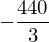

In [29]:
expr3.integrate( (x,-2,2), (y,0,10) )

### <font color='orange'>Your Turn</font>
The area of a particular triangle is given by
$$ \int_0^{10} \int_{x/2}^{3x} dy\,dx $$
Determine what that area is.

<div class='alert alert-info'>
When integrating constants, you need to use the <code>sym.integrate(expr, limits)</code> form of the integrate function, else Sympy will complain that it doesn't know how to integrate a number.
</div>

In [ ]:
# Your code here

## 3. Vector Calculus <a name='vcalc'></a>
Finally, we are going to be doing a *lot* of vector calculus this semester, and it would be nice to have a way to compute or check our work when finding gradients, divergences and curls! Sympy still has us covered here, but it is going to be a little more convoluted (which, I suppose, makes since given that vector calc is just another layer atop normal calculus...). To begin, we need to import a new sub-module of sympy: the vector module.

In [31]:
import sympy.vector as sv

Now, when dealing with vectors, our coordinate system is extremely important. Thus everything vector related in Sympy has to start out with defining a coordinate system. For a standard Cartesion coordinate system, we can do:

In [55]:
R = sv.CoordSys3D('R', vector_names=['x','y','z'])

<div class='alert alert-warning'>
If you are using an older version of Sympy, you might not have the CoordSys3D function. In this case you'll need to use CoordSysCartesian (I think) to get the old version. Then everything will mostly be the same except for when taking gradients, divergences and curls you'll need to specify the coordinate system as well. Using <code>?</code> will help you get the syntax correct.

Or you could just update Sympy.
</div>

This creates our Cartesian coordinate system and names it `R`. It also specifies that we want our unit vectors to display as $\hat{x}$, $\hat{y}$, etc.  If we want to refer to unit vectors in this coordinate system, we will use `R.i, R.j,` and `R.k` (unfortunately we can't change this). So I could define a simple vector as:

In [56]:
v1 = 1*R.i + 2*R.j + 3*R.k
v1

And we see it shows up with the nice notation. If we want to refer to the _variable_ $x$ in the $R$ coordinate system, we need to use `R.x`. So the vector
$$ \vec{v} = x \hat{x} + y\hat{y} + z\hat{z} $$
would be written as:

In [57]:
v2 = R.x * R.i + R.y * R.j + R.z * R.k
v2

It is easy to get mixed up with using `R.x` for the $\hat{x}$ unit vector, so be careful. Even if you have an expression with standard Sympy symbolic $x$ or $y$'s in it, you need to convert (or substitute) those to `R.x`'s and `R.y`'s before trying to do any vector operations on it!

Now that you can create vectors, you can add, subtract, dot or cross vectors like you'd expect:

In [58]:
v1+v2

In [59]:
v1.dot(v2)

In [60]:
v1.cross(v2)

In [61]:
v1.magnitude()

### <font color='orange'>Your Turn</font>
What is a **unit** vector that is perpendicular to both
\begin{align}
\vec{v}_1 &= 4\hat{x} + 2\hat{y} -6 \hat{z} \\
\vec{v}_2 &= -3\hat{x} -\hat{y} + 8 \hat{z}
\end{align}
? 

In [25]:
# Your Code Here

### Complex Vector Calculus
We can also do more complex vector calculus involving gradients, divergences and curls. Say we have the potential energy equation
$$ U(x,y) = 5x + \cos(xy) $$
And we'd like to find an expression for the force. Doing so requires us to take a gradient, since
$$ \vec{F} = -\nabla U $$
We'll go ahead and define our potential energy first and make sure it looks ok:

In [63]:
U = 5*R.x + sym.cos(R.x * R.y)
U

And then we can just use the vector modules `gradient` command to compute the gradient:

In [64]:
F = -sv.gradient(U)
F.simplify()

Now that we have a vector expression we can go ahead and calculate the divergence and curl of $\vec{F}$:

In [65]:
sv.divergence(F)

In [66]:
sv.curl(F) # Conservative forces yo!

### <font color='orange'>Your Turn</font>
Calculate the divergence of the force field corresponding to a potential energy of
$$ U(x,y,z) = \frac{x^2 y}{5} + \sin(y^2)\cdot z $$
and determine if the divergence is positive or negative at the point (2,4,6).

In [31]:
# Your Code Here

## Saving your Work!
Generally you are going to need to output the results of your notebook in a pdf so you can attach or combine it with your homework. If you have LaTeX installed on your system already, you might be able to use the download as pdf option from the File Menu. It might require installing a few extra packages to get functional, but if you go that route everything will get run through LaTeX and then the pdf will be generated from that. Another option that you might have is to use "Print Preview" to render the page as pure html and then print the webpage to pdf. If your computer isn't giving you a "Pdf Printer" as an option, you can also download the file as html and then use a service like this site [here](https://www.sejda.com/html-to-pdf) to convert the html page to a pdf. In some ways I think the best results might actually come from the last option, but any will work! Through whatever means necessary go ahead and save this completed notebook as a pdf and then **upload it to Gradescope**.